In [2]:
import pandas as pd
import numpy as np
import plotly.express as px
import scipy.stats as stats

# 1D Convolution (1D-CNN)

- 시퀀스 데이터를 처리할 때 CNN 합성곱 필터를 이용하여 처리
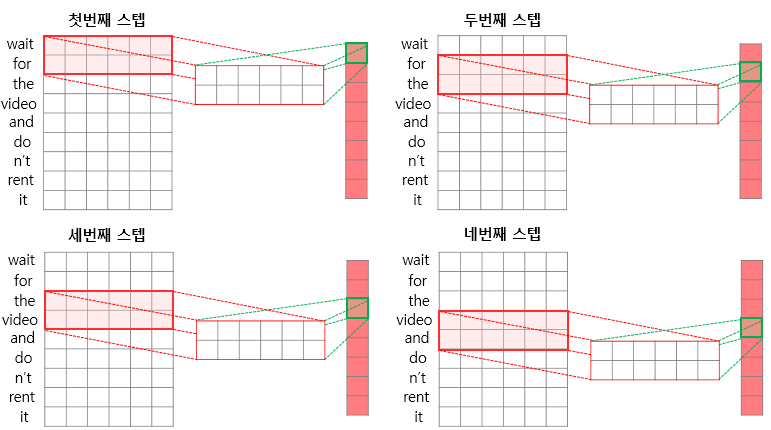


In [4]:
df2 = pd.read_excel('34_Data.xlsx')
df2.head(3)

,회사명,기술명,기술분류,설립일,신청일,평가기관,평가등급,신청은행,진행상태,대출금액,자본금
0,하나로물산,잠수함용 통합 양강마스트 개발 및 사업화,기계,2005/04/12,2013-05-09 10:43:43,기술보증기금,AA,기업은행,여신승인,30,1100
1,신식당화학,소성 가공을 통한 고강도 C형강 및 생산설비 개발,기계,1999/06/01,2013-04-29 09:55:37,기술보증기금,A,우리은행,여신거부,0,1000
2,ANT산업,조관기 설비에 의한 파이프 및 각관 생산 기술,NaN,2002/03/01,2013-04-29 10:01:47,기술보증기금,BBB,우리은행,여신거부,0,1450


In [7]:
cond1 = df2['진행상태'].isin(['여신승인','여신거부'])
df3 = df2.loc[cond1]

In [8]:
Y = df3['진행상태'].replace({'여신승인':1, '여신거부':0})
X = df3['기술명']

In [9]:
# X -> TF-IDF 기법을 활용해 처리
from sklearn.feature_extraction.text import TfidfVectorizer

In [11]:
model_tfidf = TfidfVectorizer(max_features=100) # 최대 Column수 지정
X1 = model_tfidf.fit_transform(X).toarray()

In [12]:
from sklearn.model_selection import train_test_split

In [26]:
X_train, X_test, Y_train, Y_test = train_test_split(X1,Y, test_size=0.3,
                                                   random_state=1234)

In [17]:
from keras.layers import Conv1D
from keras.layers import GlobalMaxPooling1D
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Embedding

In [27]:
model_CNN = Sequential()
model_CNN.add(Embedding(10000,8))
model_CNN.add(Conv1D(filters=128, kernel_size=5 ,activation='relu'))
model_CNN.add(GlobalMaxPooling1D())
model_CNN.add(Dense(1, activation='sigmoid'))
model_CNN.compile(optimizer='adam', loss='binary_crossentropy',
                 metrics=['accuracy'])
model_CNN.fit(X_train, Y_train, epochs=10, batch_size=32,
             validation_split=0.2)

Epoch 1/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7574 - loss: 0.6166 - val_accuracy: 0.7943 - val_loss: 0.5154
Epoch 2/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8321 - loss: 0.4507 - val_accuracy: 0.7943 - val_loss: 0.5079
Epoch 3/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8372 - loss: 0.4459 - val_accuracy: 0.7943 - val_loss: 0.5072
Epoch 4/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8228 - loss: 0.4673 - val_accuracy: 0.7943 - val_loss: 0.5125
Epoch 5/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8293 - loss: 0.4562 - val_accuracy: 0.7943 - val_loss: 0.5104
Epoch 6/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8116 - loss: 0.4806 - val_accuracy: 0.7943 - val_loss: 0.5105
Epoch 7/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8307 - loss: 0.4512 - val_accuracy: 0.7943 - val_loss: 0.5089
Epoch 8/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8147 - loss: 0.4818 - val_accuracy: 0.7943 - val_loss:

In [28]:
def threshold_func(result):
    if result >= 0.5:
        return 1
    return 0

In [29]:
Y_train_pred = pd.Series(model_CNN.predict(X_train).flatten()).apply(threshold_func)
Y_test_pred = pd.Series(model_CNN.predict(X_test).flatten()).apply(threshold_func)

45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 726us/step


In [30]:
from sklearn.metrics import classification_report

In [31]:
print(classification_report(Y_train, Y_train_pred))
print(classification_report(Y_test, Y_test_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       259
           1       0.82      1.00      0.90      1150

    accuracy                           0.82      1409
   macro avg       0.41      0.50      0.45      1409
weighted avg       0.67      0.82      0.73      1409

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       126
           1       0.79      1.00      0.88       478

    accuracy                           0.79       604
   macro avg       0.40      0.50      0.44       604
weighted avg       0.63      0.79      0.70       604



/Users/sinhyelim/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/sinhyelim/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/sinhyelim/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/